# Kicked Rotor


This is a 1D rotor, periodically kicked with a position-dependent amplitude.The Hamiltonian is given by:

\begin{align}
H 
&= {p^2\over 2I} + k \cos(\theta)\sum_{n=-\infty}^\infty \delta(t-n\tau)
\end{align}

It could be understood as a particle moving into a ring receiving some kicks eventualy in its direction. We can analyze the system by a stroboscopic point of view, building a Poincaré map by picturing the evolution once every period. The standard map can give the relation between the coordinates in phase space before the n'th kick and just before the (n+1)'th kick.


\begin{align}
p_{n+1} 
&= 
p_n + k\sin\theta_{n}
\\
\theta_{n+1} 
&=
\theta_n + {T\over I} p_{n+1}
\end{align}
or, alternatively,
\begin{align}
\theta_{n+1} 
&=
\theta_n + {T\over I} p_n
\\
p_{n+1} 
&= 
p_n + k\sin\theta_{n+1}
\end{align}

https://en.wikipedia.org/wiki/Kicked_rotator

http://www.scholarpedia.org/article/Chirikov_standard_map

https://boulderschool.yale.edu/sites/default/files/files/Delande-kicked_rotor_lectures_1_and_2.pdf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [19]:
#strenth of the kick on the system
k=0.5
T=1

#how many points one trajectory should have, each trajectory will be a line, and each line will have this number of points
Points=1000
Traj=200

#initialization of size
p=np.zeros((Points, Traj))
x=np.zeros((Points, Traj))

#initialization of random values for x and p. Angular variables, values are modulated in range of 2pi

x[0,:]=np.random.rand(Traj)*2.*np.pi
p[0,:]=np.random.rand(Traj)*2.*np.pi

#function that defines the standard map mentioned above, for each trajectory the iteration goes for the number of points
def KT(x,p):
    for j in range(0,Traj):        
        for n in range(Points-1):
            x[n+1,j]=x[n,j]+T*p[n,j]
            p[n+1,j]=T*p[n,j]+T*k*np.sin(x[n+1,j])
#the function return the remainder of 2pi to assure that it belongs to a single round along a ring            
    return np.mod(x,2.*np.pi),np.mod(p,2.*np.pi)

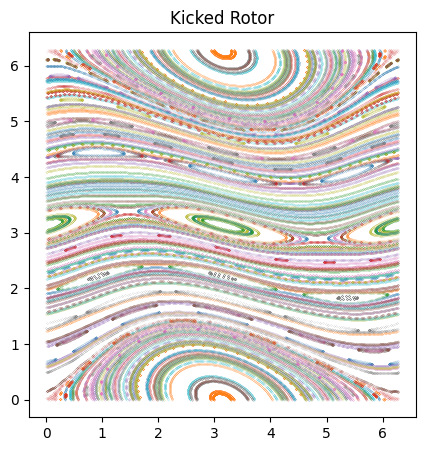

In [20]:
matplotlib.rcParams['figure.figsize']=5., 5.

#ploting the map
x,p=KT(x,p)
plt.plot(x,p,'.', markersize=0.1)
plt.title('Kicked Rotor')
plt.savefig("exemplo.png")
plt.show()

In [21]:
#create four maps for different kicks

matplotlib.rcParams['figure.figsize']=15., 15.
T=1
#how many points one trajectory should have, each trajectory will be a line, and each line will have this number of points
Points=1000
Traj=200
#initialization of size
p=np.zeros((Points, Traj))
x=np.zeros((Points, Traj))
#function that defines the standard map mentioned above, for each trajectory the iteration goes for the number of points
#here the kick is an argument of the function
def KT(x,p,k):
    #initialization of random values for x and p, angular variables, values are modulated in range of 2pi
    x[0,:]=np.random.rand(Traj)*2.*np.pi
    p[0,:]=np.random.rand(Traj)*2.*np.pi
    for j in range(0,Traj):        
        for n in range(Points-1):
            x[n+1,j]=x[n,j]+T*p[n,j]
            p[n+1,j]=T*p[n,j]+T*k*np.sin(x[n+1,j])           
#the function return a value that is then divided by 2pi to assure that it belongs to a single round along a ring                        
    return [np.mod(x,2.*np.pi), np.mod(p,2.*np.pi)]
#our kick here goes into a variety of values in a array
e = 0
k_array = np.array([0.,0.5,0.97,5.])
k = k_array[e]
x,p = KT(x,p,k)

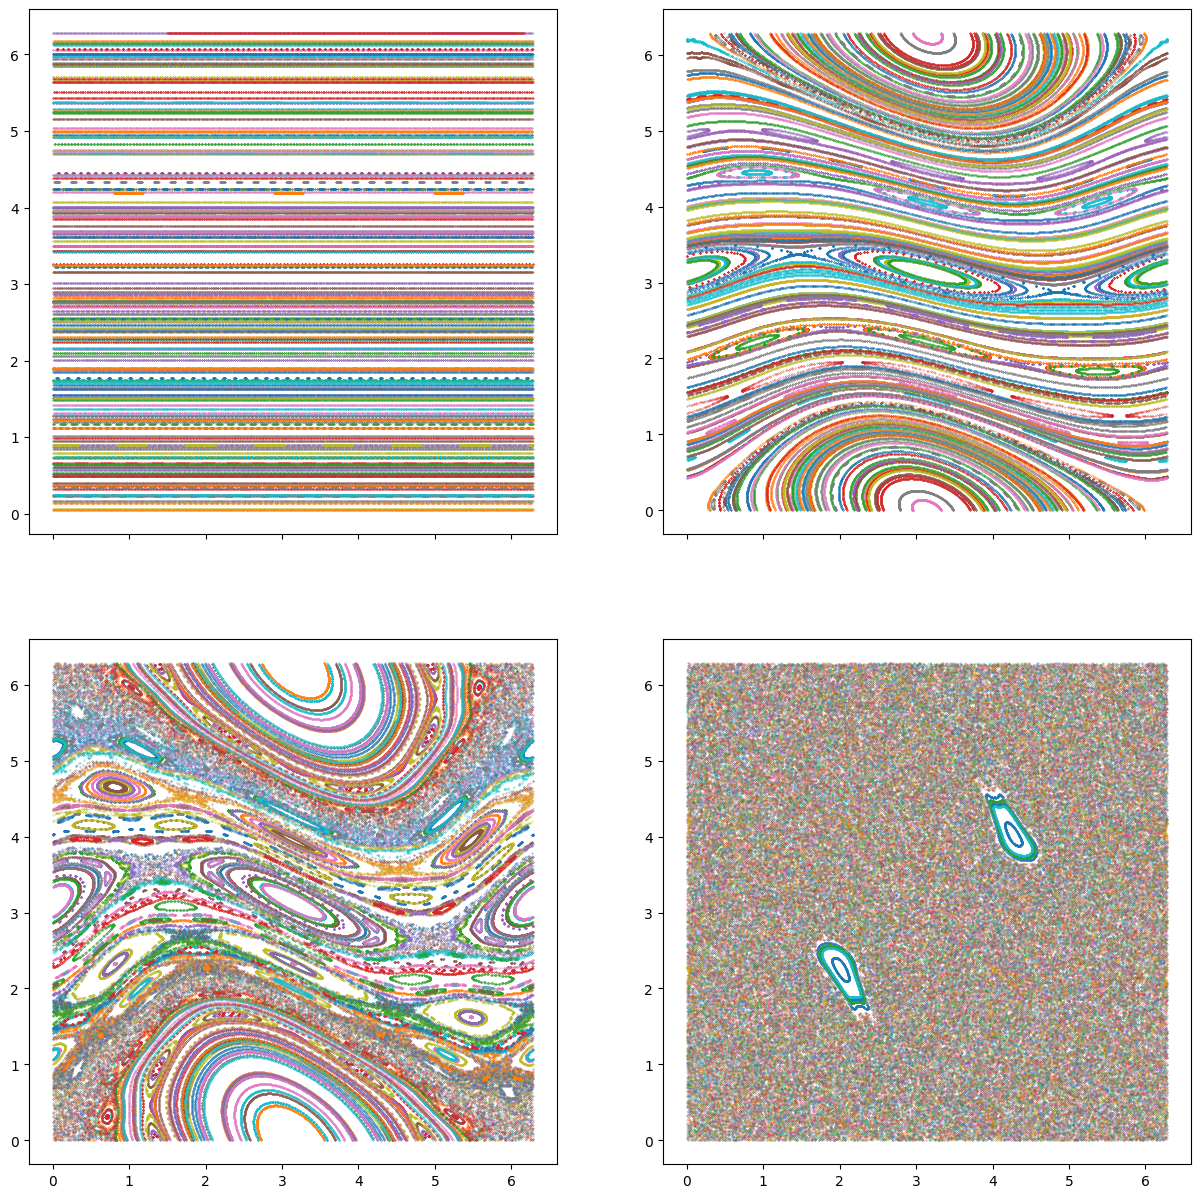

In [22]:
#ploting the map for diferent values of kicks in a single figure
fig, axes = plt.subplots(int(len(k_array)/2),int(len(k_array)/2), sharex=True)
#the loops are for the subplots, there should be a easier way of doing it...
for l in range(int(len(k_array)/2)):
    for o in range(int(len(k_array)/2)): 
        k = k_array[e]
        e += 1
        x,p = KT(x,p,k)
        axes[l,o].plot(x,p,'.', markersize=0.5 )

Criando dados para treino

In [ ]:
Points= 500
Traj=200
p=np.zeros((Points, Traj))
x=np.zeros((Points, Traj))


k = 0.0
ps = KT(x,p,k)
Evento = [ps]
K_value = [[k]]

for k in range(1,5000): #k
    k = float(k/1000)
    ps = KT(x,p,k)
    Evento = np.concatenate((Evento, [ps]))
    K_value = np.concatenate((K_value, [[k]]))
    #saving as figures
    #plt.plot(x,p,'.', markersize=0.04)
    #plt.axis('off')
    #plt.savefig("Dados_1/KR_k-" + str(k) + ".png", bbox_inches='tight')


In [ ]:
#saving data as npy

np.save("Dados_1/PS.npy", Evento)
np.save("Dados_1/K.npy", K_value)

In [ ]:
#creating smaller data

matplotlib.rcParams['figure.figsize']=5., 5.

for k in range(0,3683):
    plt.plot(Evento[k][0],Evento[k][1],'.', markersize=0.04, color ='k')
    plt.axis('off')
    plt.savefig("Dados_2/KR_k-" + str(k/1000) + ".png", bbox_inches='tight')
    plt.clf()

<Figure size 500x500 with 0 Axes>